# ALGERIAN CAR NUMBER PLATE DETECTION AND RECOGNITION 

# Description

In the modern domain of traffic control and surveillance systems, the imperative of Automated Car Number Plate Detection (NPD) and Recognition cannot be emphasized enough. As the number of vehicles continues to rise, the capability to accurately detect and identify license plates via automated means has emerged as a cornerstone of efficient traffic management. This technology assumes paramount significance in facilitating streamlined toll collection processes, optimizing parking management, enforcing regulatory measures, and fortifying security protocols. Consequently, the development of precise and reliable Car Number Plate Detection and Recognition Systems using computer vision and deep learning techniques has become crucial to enhance various aspects of transportation and security.
This project focuses on preparing and enhancing the quality of data collected to improve the performance of machine learning models.It will also involve collecting and analyzing data , cleaning and preprocessing the data, and extracting relevant features to train machine learning models.

# Table of contents

# 1 Introduction
### 2 Data collection 
#### 2.1 Imports
#### 2.2 Data method
### 3 Visualization
### 4 Exploratory Data Analysis(EDA)
### 5 Data Preprocessing
#### 5.1 Data Cleaning 
#### 5.4 Feature Engineering

# 1- Introduction

Automated Car Number Plate Detection (NPD) technology is essential for effective traffic management as the number of vehicles grows. NPD systems, which utilize computer vision for precise vehicle identification, contribute significantly to toll collection, parking management, regulatory compliance, and security enhancement. This technology is invaluable in various applications, including optimizing parking space usage, ensuring adherence to traffic regulations, and enhancing overall transportation system security.

In our project, we worked on two databases, the first one for License Plates of world and the second for License Plates of Algeria. we will start with License Plates of world.

# A- License Plates Dataset of Algeria:

# 2- Data collection

## 2.1 Imports

The import statement is used in programming to include external libraries or modules in a script or program.
You can import any necessary libraries, such as Pandas for data manipulation and Matplotlib for data visualization.
os used to interact with the operating system pytesseract for Text extraction re for Regular expressions cv2 (OpenCV)for Image processing PIL for image preprocessing.


In [60]:
import cv2
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
import pytesseract
import glob
import os
import re

## 2.2 Data method

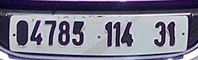

In [2]:
image_path = "0478511431_1.jpg"
image = Image.open(image_path)
display(image)

Shape of the resulting array: (60, 198, 3)


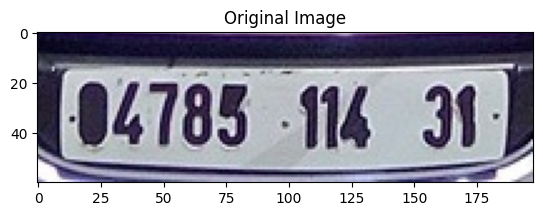

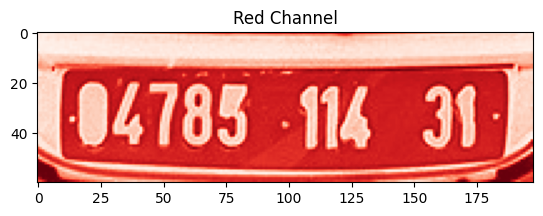

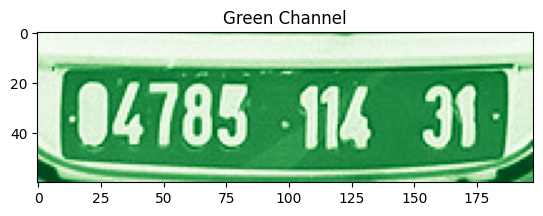

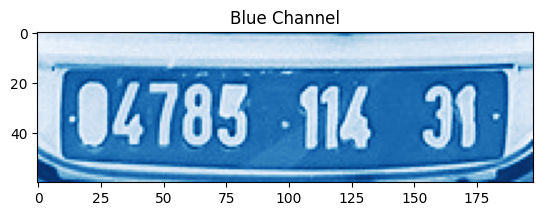

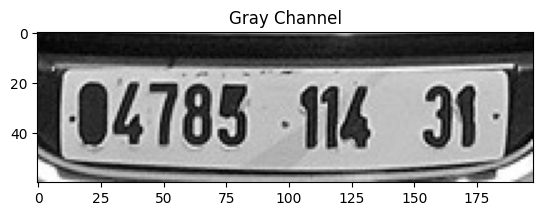

In [3]:
# Turn our image object into a NumPy array
image_array = np.array(image)

# Get the shape of the resulting array
image_array_shape = image_array.shape
print("Shape of the resulting array:", image_array_shape)

# Display the entire image
plt.imshow(image_array)
plt.title("Original Image")
plt.show()

# Plot the red channel
plt.imshow(image_array[:, :, 0], cmap='Reds')
plt.title("Red Channel")
plt.show()

# Plot the green channel
plt.imshow(image_array[:, :, 1], cmap='Greens')
plt.title("Green Channel")
plt.show()

# Plot the blue channel
plt.imshow(image_array[:, :, 2], cmap='Blues')
plt.title("Blue Channel")
plt.show()

# Plot the gray and white channel
plt.imshow(image.convert('L'), cmap='gray')
plt.title("Gray Channel")
plt.show()


### Converting photos into black and white 

We choose to Converting photos to black and white before applying OCR enhances contrast, simplifies data, and reduces noise, leading to improved character recognition accuracy. The elimination of color-related issues ensures a standardized input format for OCR algorithms. Black and white transformation is particularly beneficial in cases where color variations are irrelevant to text content. It can mitigate sensitivity to lighting, shadows, and gradients, providing a cleaner image for optimal OCR performance. Experimentation is recommended to assess the impact on OCR results based on specific image characteristics and algorithm requirements.

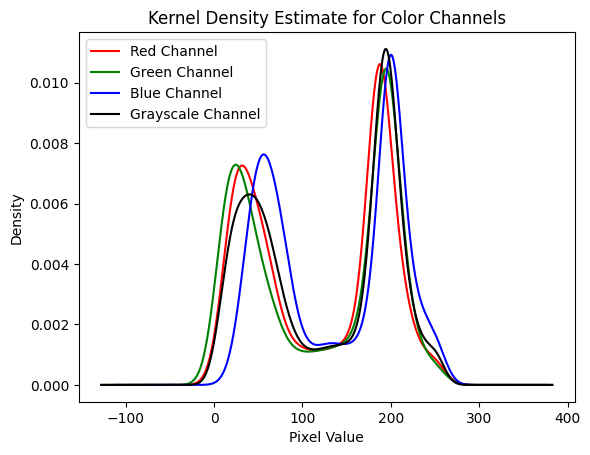

In [5]:
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        channel must be a 2d array
        color must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels

# Create the list of channels
channels = [
    image_array[:, :, 0],  # Red channel
    image_array[:, :, 1],  # Green channel
    image_array[:, :, 2],  # Blue channel
    image_array,      # Grayscale channel
]

# Plot kernel density estimates for each channel
colors = ['r', 'g', 'b', 'black']
for channel, color in zip(channels, colors):
    plot_kde(channel, color)

# Set plot labels
plt.xlabel("Pixel Value")
plt.ylabel("Density")
plt.legend(["Red Channel", "Green Channel", "Blue Channel", "Grayscale Channel"])
plt.title("Kernel Density Estimate for Color Channels")
plt.show()

we see that the photos with black and white more density thats a main reason why we choose to workwith it

### Description about opencv ocr

is a tool within the Open Source Computer Vision Library designed to recognize and extract text from images or videos. It supports multiple languages, integrates seamlessly with other computer vision tasks, and is open source and cross-platform. OpenCV OCR is commonly used for automated document processing, data extraction from images, real-time text recognition in videos, and accessibility enhancements. It's a versatile solution for converting text in images into machine-readable formats, enabling applications in diverse fields.

### why i choose opencv for my project?

I choose to work with opencv because it offers versatility, supporting multiple languages and seamless integration with various computer vision tasks. Its automation capabilities streamline document processing and data extraction from images, reducing manual effort. Real-time text recognition in videos makes it suitable for applications requiring immediate processing. OpenCV OCR contributes to accessibility by converting image text for text-to-speech systems, aiding users with visual impairments. Being open source and cross-platform, it allows customization and collaborative development across different operating systems.

In [7]:
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [8]:
import cv2
imgocr = cv2.imread('0497219010.jpg')

In [9]:
columns = ['filename','plate_content']
df = pd.DataFrame(columns=columns)

In [10]:
csv_file = 'plates.csv'
df.to_csv(csv_file,index=False)

In [11]:
jpg_files = glob.glob('test/*.jpg')

### Convert Image into Black and White to simplify the reading of plates content

In [ ]:
def convert_images_to_gray(input_folder='test', output_folder='test_gray'):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get a list of all JPEG files in the input folder
    jpg_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]

    for jpg_file in jpg_files:
        # Construct the file paths
        input_path = os.path.join(input_folder, jpg_file)
        output_path = os.path.join(output_folder, jpg_file)

        # Read the image
        img = cv2.imread(input_path)

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Save the grayscale image
        cv2.imwrite(output_path, gray_image)

convert_images_to_gray()

In [12]:
import os
data_to_append = []

### insert data and use ocr model to insert the content plate

In [13]:
for jpg_file in jpg_files:
    # Extract filename without extension
    filename = os.path.splitext(os.path.basename(jpg_file))[0]

    # Read the image
    imgocr = cv2.imread(jpg_file)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(imgocr, cv2.COLOR_BGR2GRAY)

    # Perform OCR to extract text from the image
    text = pytesseract.image_to_string(gray_image, config='--psm 6')

    # Replace newline characters with spaces
    text = text.replace('\n', ' ')

    # Append data to the list with filename and OCR result
    data_to_append.append({'filename': filename, 'plate_content': text})

# Concatenate the new data with the existing DataFrame
df = pd.concat([df, pd.DataFrame(data_to_append)], ignore_index=True)

# Save the updated DataFrame to the CSV file
df.to_csv(csv_file, index=False)

In [14]:
df

,filename,plate_content
0,00004741816,000047 418 16
1,00012341316,Gnacg
2,00015271216,annis? 712 16.
3,00039231816,600392 318 16
4,00193811816,001938 118 16
...,...,...
234,3661011216,36610 112 16
235,3665311216,—_——_ 36653 1127161
236,4051510716,#40515 107 16
237,4776911016,£7169 110 16


### test the images of dataset

In [16]:
def display_image_by_id(df, target_id):
    # Check if the ID exists in the DataFrame
    if target_id not in df.index:
        print(f"ID {target_id} not found in the DataFrame.")
        return

    # Get the filename for the specified ID
    filename = df.at[target_id, 'filename']

    # Construct the full path to the image
    image_path = os.path.join('test', f"{filename}.jpg")  # Update the path accordingly

    # Open and display the image using PIL
    img = Image.open(image_path)
    img.show()

# Assuming df is already loaded with data
# For example, display the image with ID 1

In [47]:
display_image_by_id(df, target_id=222)

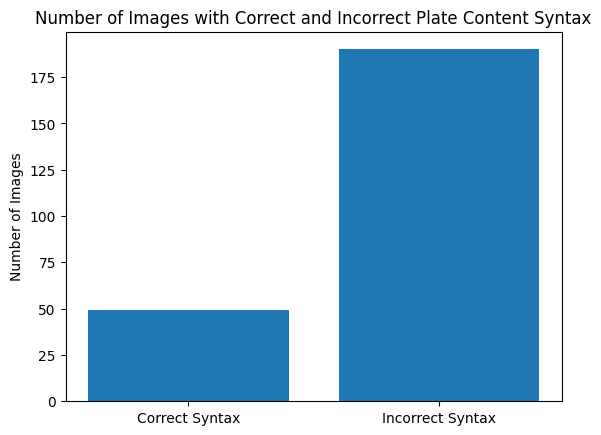

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import re


# Function to check if plate content has correct syntax
def is_correct_syntax(plate_content):
    
    # Strip leading and trailing whitespaces before applying the regex
    plate_content = str(plate_content).strip()

    pattern = re.compile(r'^\d{5,6}\s\d{3}\s\d{2}$')
    return bool(pattern.match(str(plate_content)))

# Apply the function to create a new column 'is_correct_syntax'
df['is_correct_syntax'] = df['plate_content'].apply(is_correct_syntax)

# Convert 'is_correct_syntax' column to boolean type
df['is_correct_syntax'] = df['is_correct_syntax'].astype(bool)

# Group by 'is_correct_syntax' and count occurrences
syntax_counts = df['is_correct_syntax'].value_counts()

# Plotting
fig, ax = plt.subplots()

# Plot for correct syntax
ax.bar(['Correct Syntax', 'Incorrect Syntax'], [syntax_counts.get(True, 0), syntax_counts.get(False, 0)], color=['green', 'red'])

# Set labels and title
ax.set_ylabel('Number of Images')
ax.set_title('Number of Images with Correct and Incorrect Plate Content Syntax')

# Save the updated DataFrame to the existing CSV file
df.to_csv('plates.csv', index=False)

# Display the plot
plt.show()


# 3 - Data Visualization

## Number of Images with Correct and Incorrect Plate Content Syntax plot

### Description

The graph of  "Number of Images with Correct and Incorrect Plate Content Syntax" is a bar chart that visually compares the distribution of images based on the correctness of the plate content syntax it contain two categories:

Correct Syntax: This category represents the number of images where the plate content syntax is correct. The corresponding bar, likely colored in green, shows the quantity of images falling into this group.

Incorrect Syntax: This category represents the number of images where the plate content syntax is incorrect. The corresponding bar, likely colored in red, illustrates the quantity of images with syntax errors.

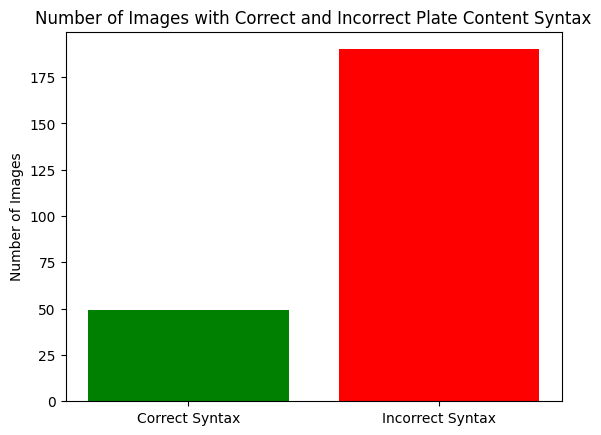

In [24]:
# Plotting
fig, ax = plt.subplots()

# Plot for correct syntax
ax.bar(['Correct Syntax', 'Incorrect Syntax'], [syntax_counts.get(True, 0), syntax_counts.get(False, 0)], color=['green', 'red'])

# Set labels and title
ax.set_ylabel('Number of Images')
ax.set_title('Number of Images with Correct and Incorrect Plate Content Syntax')
plt.savefig('plot.png')
plt.show()

In [25]:
# Print the number of rows with correct syntax
num_correct_syntax = df['is_correct_syntax'].sum()
print(f'Number of rows with correct syntax: {num_correct_syntax}')

# Print the number of rows with incorrect syntax
num_incorrect_syntax = len(df) - num_correct_syntax
print(f'Number of rows with incorrect syntax: {num_incorrect_syntax}')



Number of rows with correct syntax: 49
Number of rows with incorrect syntax: 190


# 4 - Exploratory Data Analysis(EDA)

In [18]:
df.shape

(239, 3)

In [19]:
df

,filename,plate_content,is_correct_syntax
0,00004741816,000047 418 16,True
1,00012341316,Gnacg,False
2,00015271216,annis? 712 16.,False
3,00039231816,600392 318 16,True
4,00193811816,001938 118 16,True
...,...,...,...
234,3661011216,36610 112 16,True
235,3665311216,—_——_ 36653 1127161,False
236,4051510716,#40515 107 16,False
237,4776911016,£7169 110 16,False


In [26]:
df.head()

,filename,plate_content,is_correct_syntax
0,00004741816,000047 418 16,True
1,00012341316,Gnacg,False
2,00015271216,annis? 712 16.,False
3,00039231816,600392 318 16,True
4,00193811816,001938 118 16,True


In [61]:
df.head()

,filename,plate_content,is_correct_syntax,plate_content_numeric_scaled,plate_content_numeric
0,00004741816,000047 418 16,1.0,5.206657e-07,5.206657e-07
1,00012341316,Gnacg,0.0,1.019759e-02,1.019759e-02
2,00015271216,annis? 712 16.,0.0,7.818001e-09,7.818001e-09
3,00039231816,600392 318 16,1.0,6.592511e-03,6.592511e-03
4,00193811816,001938 118 16,1.0,2.128119e-05,2.128119e-05


In [63]:
df.size

1195

In [64]:
df.tail()

,filename,plate_content,is_correct_syntax,plate_content_numeric_scaled,plate_content_numeric
234,3661011216,36610 112 16,1.0,0.000402,0.000402
235,3665311216,—_——_ 36653 1127161,0.0,0.040246,0.040246
236,4051510716,#40515 107 16,0.0,0.000445,0.000445
237,4776911016,£7169 110 16,0.0,0.000079,0.000079
238,6742210816,67422 108 16,1.0,0.000740,0.000740


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   filename                      239 non-null    object 
 1   plate_content                 239 non-null    object 
 2   is_correct_syntax             239 non-null    float64
 3   plate_content_numeric_scaled  239 non-null    float64
 4   plate_content_numeric         239 non-null    float64
dtypes: float64(3), object(2)
memory usage: 9.5+ KB


In [66]:
df.describe()

,is_correct_syntax,plate_content_numeric_scaled,plate_content_numeric
count,239.000000,239.000000,239.000000
mean,0.205021,0.010198,0.010198
std,0.404564,0.075583,0.075583
min,0.000000,0.000000,0.000000
25%,0.000000,0.000056,0.000056
50%,0.000000,0.000209,0.000209
75%,0.000000,0.010198,0.010198
max,1.000000,1.000000,1.000000


In [67]:
df.count()

filename                        239
plate_content                   239
is_correct_syntax               239
plate_content_numeric_scaled    239
plate_content_numeric           239
dtype: int64

# 5- Data Preprocessing

In [50]:
df['plate_content_numeric'].fillna(df['plate_content_numeric'].mean(), inplace=True)


In [56]:
df['plate_content_numeric_scaled'].fillna(df['plate_content_numeric_scaled'].mean(), inplace=True)


Unique values after normalization:
plate_content_numeric    184
is_correct_syntax          2
dtype: int64


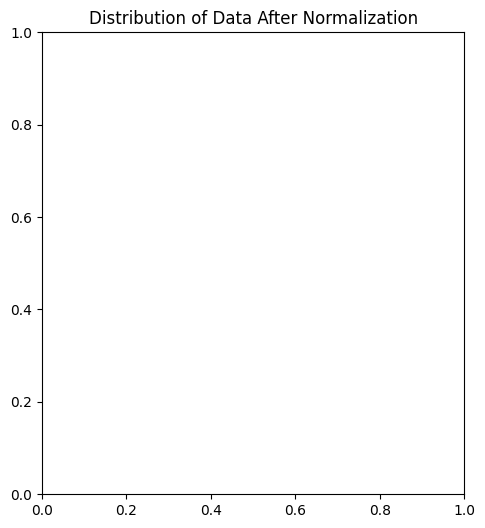

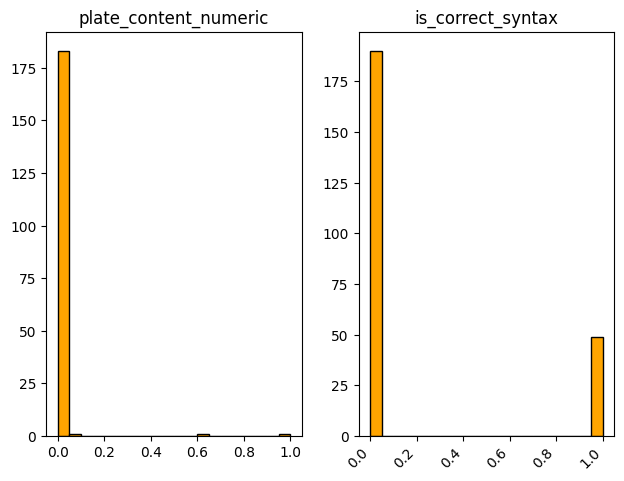

In [73]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import re

# Assuming 'plate_content' column contains strings like '000047 418 16 '
# Extract the numeric part using regular expression
df['plate_content_numeric'] = df['plate_content'].apply(lambda x: re.sub(r'\D', '', x))

# Convert the extracted numeric part to numeric type
df['plate_content_numeric'] = pd.to_numeric(df['plate_content_numeric'], errors='coerce')

# Select columns to scale
columns_to_scale = ['plate_content_numeric', 'is_correct_syntax']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print some information for debugging
print("Unique values after normalization:")
print(df[columns_to_scale].nunique())

# Visualize the distribution after normalization
plt.figure(figsize=(12, 6))

# Histogram after scaling
plt.subplot(1, 2, 2)
plt.title('Distribution of Data After Normalization')
df[columns_to_scale].hist(bins=20, color='orange', edgecolor='black', grid=False)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()
